## Observations and Insights 

#### 1.     The Pymaceuticals drug of interest, Capomulin performed exceptionally well against other treatment regimens. Out of the 10 selected for comparison, Capomulin was in the top two most effective drug regimens. Only the drug Ramicane outperformed Capomulin  with a slighty lower Average Tumor Volume after 45 days. The two drugs can most likely be viewed as having similar performance. 

#### 2.     Capomulin succesfully decreased the SCC tumor growth in mice. Also it most likely increased the life span of the mice that were on this drug regimen. This can be inferred by the increased number of measurements over the 45 days compared to all other drugs in the study. The decreased reading are most likely due to the deaths of the mice in the study. 

#### 3.     The weight of the mice in this study strongly correlated to the measured Tumor Volume with a Pearson correlation coefficient of 0.84. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMice = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicateMice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = study_data_complete[study_data_complete["Mouse ID"]=="g989"]
# set the index to the mouse ID
duplicateMiceData = duplicateMiceData.set_index("Mouse ID")
# check the mouse data for ID
duplicateMiceData

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanStudyData = study_data_complete[study_data_complete["Mouse ID"].isin(duplicateMice)==False]
cleanStudyData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleanStudyData["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean = cleanStudyData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median = cleanStudyData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance = cleanStudyData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
stdDEV = cleanStudyData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sems = cleanStudyData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumorVolumeDataDF = pd.DataFrame ({
    "Mean Tumor Volume": mean, 
    "Median Tumor Volume": median, 
    "Tumor Volume Variance": variance, 
    "Tumor Volume Stdev": stdDEV,
    "Tumor Volume SEM": sems
})

# Preview DataFrame
tumorVolumeDataDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumorVolumeData_df = cleanStudyData.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]
})
tumorVolumeData_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

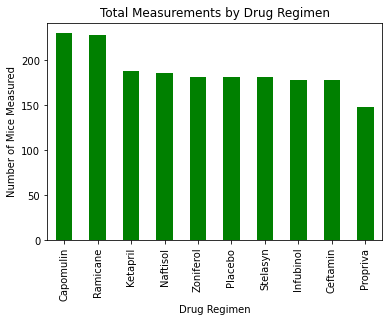

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugMeasurementCount = cleanStudyData["Drug Regimen"].value_counts()
drugMeasurementCount.plot(kind="bar", color="g")
plt.ylabel("Number of Mice Measured")
plt.xlabel("Drug Regimen")
plt.title("Total Measurements by Drug Regimen")
plt.show()

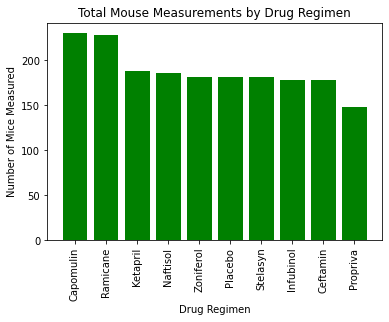

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drugMeasurementCount.index.values, drugMeasurementCount.values, color='g')
plt.ylabel("Number of Mice Measured")
plt.xlabel("Drug Regimen")
plt.title("Total Mouse Measurements by Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()


In [11]:
sex = cleanStudyData["Sex"].value_counts()
sex

Male      958
Female    922
Name: Sex, dtype: int64

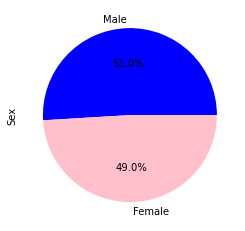

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "pink"])
plt.show()

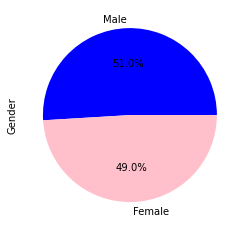

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex.values, labels=sex.index.values, autopct="%1.1f%%", colors=["blue", "pink"])
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
drugRegimen_df = cleanStudyData.set_index("Drug Regimen")
drugRegimen_df = drugRegimen_df.drop(index= ["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"])

# isolated view of just capomulin for later use
capomulinDF = cleanStudyData.loc[cleanStudyData["Drug Regimen"] == "Capomulin",:]

# Reset index so drug regimen column persists after inner merge
drugRegimen_df = drugRegimen_df.reset_index()

# get mouse count per drug
countCapomulin = drugRegimen_df["Drug Regimen"].value_counts()["Capomulin"]
countRamicane = drugRegimen_df["Drug Regimen"].value_counts()["Ramicane"]
countInfubinol = drugRegimen_df["Drug Regimen"].value_counts()["Infubinol"]
countCeftamin = drugRegimen_df["Drug Regimen"].value_counts()["Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = drugRegimen_df.groupby("Mouse ID")["Timepoint"].max()
lastTimepoint = lastTimepoint.reset_index()
lastTimepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = lastTimepoint.merge(drugRegimen_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df = merged_df.set_index("Mouse ID")
# show all rows of data
pd.set_option('display.max_rows', None)
merged_df

,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,Infubinol,67.973419,2,Female,20,23
a251,45,Infubinol,65.525743,1,Female,21,25
a275,45,Ceftamin,62.999356,3,Female,20,28
a411,45,Ramicane,38.407618,1,Male,3,22
a444,45,Ramicane,43.047543,0,Female,10,25
a520,45,Ramicane,38.810366,1,Male,13,21
a577,30,Infubinol,57.031862,2,Female,6,25
a644,45,Ramicane,32.978522,1,Female,7,17
a685,45,Infubinol,66.083066,3,Male,8,30


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in drugList: 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVolume = merged_df.loc[merged_df["Drug Regimen"]== t, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolList.append(finalTumorVolume)
    
    quartiles = finalTumorVolume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    median = finalTumorVolume.median()
    
    # Determine outliers using upper and lower bounds
    outliers = finalTumorVolume.loc[(finalTumorVolume < lowerbound) | (finalTumorVolume > upperbound)]
    print(f"{t} Drug Regimen")
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The median of Tumor Volume is: {median}")
    print(f"Values below {lowerbound} could be outliers.")
    print(f"Values above {upperbound} could be outliers.")
    print(f"-----------------------------------------------")

Infubinol Drug Regimen
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The median of Tumor Volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-----------------------------------------------
Ceftamin Drug Regimen
The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The median of Tumor Volume is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-----------------------------------------------
Ramicane Drug Regimen
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The median of Tumor Volume is: 36.56165229
Values below 

Text(0.5, 1.0, 'Tumor Volume for Drug Regimen')

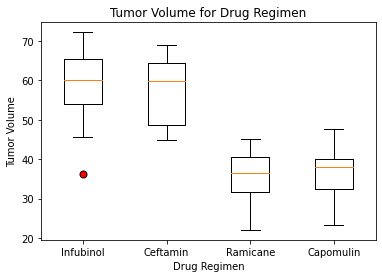

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# set drugs to be analyzed, colors for the plots, and markers
red_outlier = dict(markerfacecolor="red", markersize=7)
plt.boxplot(tumorVolList, labels=drugList, flierprops=red_outlier)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title ("Tumor Volume for Drug Regimen")


## Line and Scatter Plots

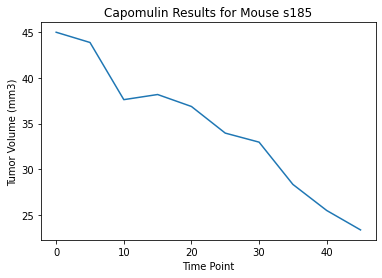

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#remove other mouse IDs so only s185 shows
mouse_s185 = capomulinDF.loc[capomulinDF["Mouse ID"]== "s185"]
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Capomulin Results for Mouse s185")
plt.show()

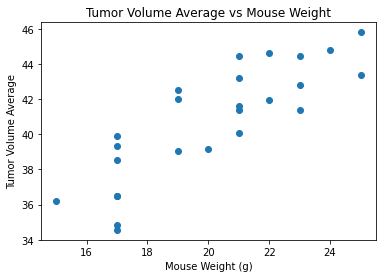

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
capomulinAvgTV = capomulinDF.groupby("Mouse ID").mean()
plt.scatter(capomulinAvgTV["Weight (g)"], capomulinAvgTV["Tumor Volume (mm3)"])

# establish x-axis value for the weight of the mice
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")

# produce scatter plot of the data
plt.show()

## Correlation and Regression

The correlation between the Mouse Weight Tumor Volume Average is 0.84


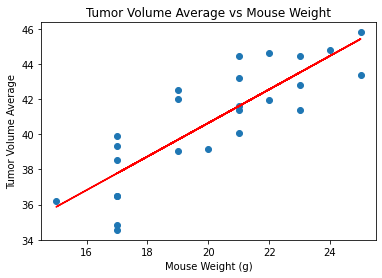

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(capomulinAvgTV["Weight (g)"], capomulinAvgTV["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between the Mouse Weight Tumor Volume Average is {correlation:.2f}")

# establish linear regression values
value = st.linregress(capomulinAvgTV["Weight (g)"], capomulinAvgTV["Tumor Volume (mm3)"])

#  y = mx+b
yValues = capomulinAvgTV["Weight (g)"] * value[0] + value[1]

# scatter plot of the data
plt.scatter(capomulinAvgTV["Weight (g)"], capomulinAvgTV["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")

#linear regression line
plt.plot(capomulinAvgTV["Weight (g)"], yValues, color="red")
plt.show()